# Customer Churn Prediction for GNB Bank

## Group Members


## 1. Introduction

GNB Bank is a leading financial institution, providing various banking and financial services to its customers. As with any bank, customer retention is crucial for maintaining a strong market presence and sustaining profitability. Identifying customers who are likely to churn is of paramount importance for GNB Bank to implement targeted strategies and retain valuable customers. In this notebook, we will explore a dataset containing customer information, including demographics, banking behavior, and historical churn data. Our objective is to build a predictive model that can accurately predict customer churn and provide valuable insights to help GNB Bank enhance its customer retention efforts.

## 2. Business Understanding

For GNB Bank, understanding and predicting customer churn is critical for several reasons. First and foremost, customer churn impacts the bank's revenue and profitability. Acquiring new customers is more expensive than retaining existing ones, so preventing churn can lead to significant cost savings. Moreover, customer retention contributes to a positive reputation and strengthens the bank's position in the highly competitive financial industry. By leveraging machine learning techniques to predict customer churn, GNB Bank can proactively address the needs of at-risk customers, personalize their banking experience, and develop targeted marketing campaigns to foster long-term customer loyalty.

## 3. Problem Statement

The goal of this project is to build an accurate customer churn prediction model for GNB Bank. Specifically, we aim to develop a machine learning model that can predict whether a customer is likely to churn or not based on their historical behavior and demographic information. The project involves the following tasks:

Exploratory Data Analysis (EDA): We will explore the dataset to gain insights into customer demographics, banking behavior, and the distribution of churned customers. EDA will help us understand the data and identify patterns that may be indicative of churn.

Data Preprocessing: We will handle missing values, encode categorical variables, and perform feature scaling to prepare the data for model training.

Feature Importance Analysis: Using SHAP (SHapley Additive exPlanations), we will identify the most important features that influence customer churn for GNB Bank.

Model Building: We will train and evaluate two machine learning models - Decision Trees and Random Forests - to predict customer churn accurately.

Model Evaluation: The performance of the models will be assessed using various evaluation metrics, such as accuracy, F1 score, precision, recall, and the ROC-AUC curve.

Interpretation and Recommendations: We will interpret the model results to identify key factors contributing to customer churn for GNB Bank. Based on the insights gained, we will provide actionable recommendations to the bank on strategies to reduce churn and improve customer retention.

By completing these tasks, we aim to deliver a robust customer churn prediction model that will enable GNB Bank to make data-driven decisions, enhance customer satisfaction, and strengthen its market position in the competitive financial industry.

**1.RowNumber:** A sequential number assigned to each row in the dataset.

**2.CustomerId:** A unique identifier for each customer in the bank.

**3.Surname:** The last name of the customer.

**4.CreditScore:** The credit score of the customer, representing their creditworthiness.

**5.Geography:** The geographical location of the customer (e.g., France, Spain, Germany).

**6.Gender:** The gender of the customer (Male or Female).

**7.Age:** The age of the customer.

**8.Tenure:** The number of years the customer has been with the bank.

**9.Balance:** The account balance of the customer.

**10.NumOfProducts:** The number of bank products the customer has purchased.

**11.HasCrCard:** Whether the customer has a credit card (1 if yes, 0 if no).

**12.IsActiveMember:** Whether the customer is an active member (1 if yes, 0 if no).

**13.EstimatedSalary:** The estimated salary of the customer.

**14.Exited:** The target variable indicating whether the customer churned (1 if yes, 0 if no).

## 4. Data Understanding

### 4.1 Importing the relevant libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings('ignore')
sns.set_style('darkgrid')

### 4.2 Loading the Data

In [2]:
df = pd.read_csv("Churn Modeling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Drop the columns that wont be required in building the models. For instance the Rownumber, customerId, Surname wont be needed.

In [3]:
# dropping columns that wont be need for analysis and modelling
data = df.drop(['RowNumber','CustomerId', 'Surname'], axis=1)

## Data Preparation

In [4]:
# Check the shape of the dataset.
data.shape

(10000, 11)

In [5]:
# Get an overview of the dataset, if there are any missing values and whether the columns has relevant/expected data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


The data has no missing values and all the columns are in the expected data types.

In [6]:
# checking for descriptive statistics
data.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


## Exploratory Data Analysis
* We are to explore the impact of the columns on the exited(which is out target vairable).
* Check multicollinearity using the correltaion plot
* Check the relation of the categorical data on the customers churned(Exited).

#### Whats the distribution of the Extied column

In [7]:
# Find the unique count of the churned
data.Exited.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

<Axes: xlabel='Exited', ylabel='count'>

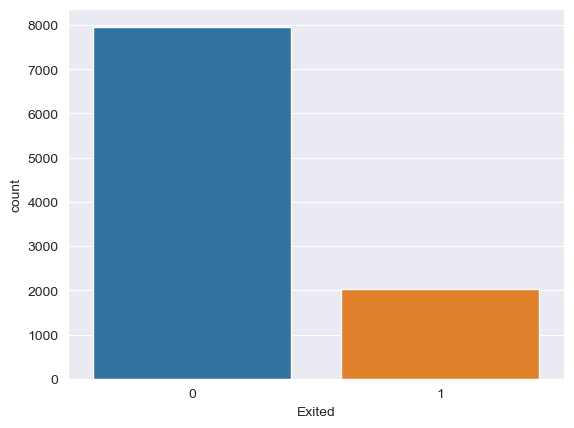

In [8]:
# A bar graph to show the distribution
plt.Figure(figsize=(12,6))
sns.countplot(x='Exited' ,data=data)

Check how the churning relates with all other numerical columns

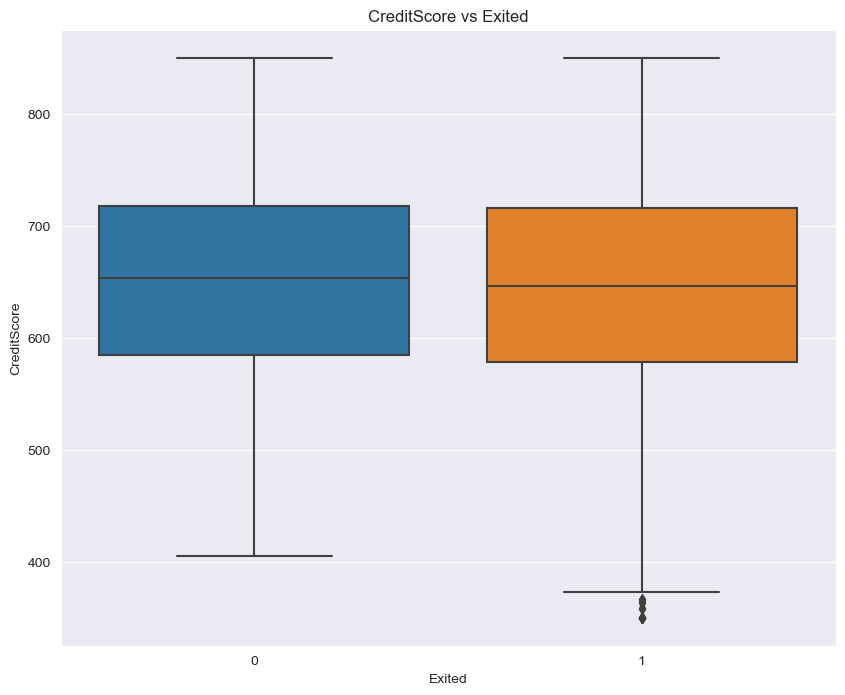

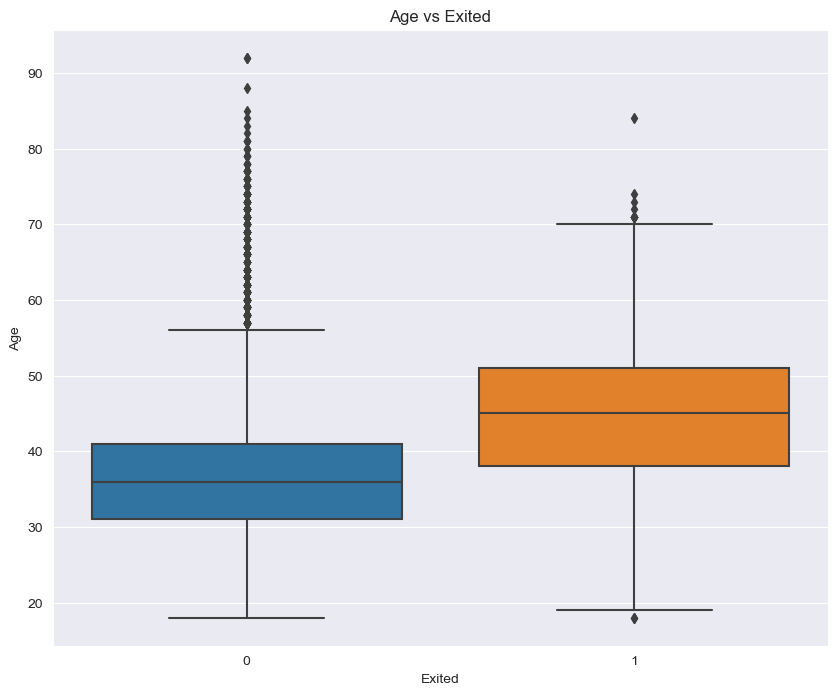

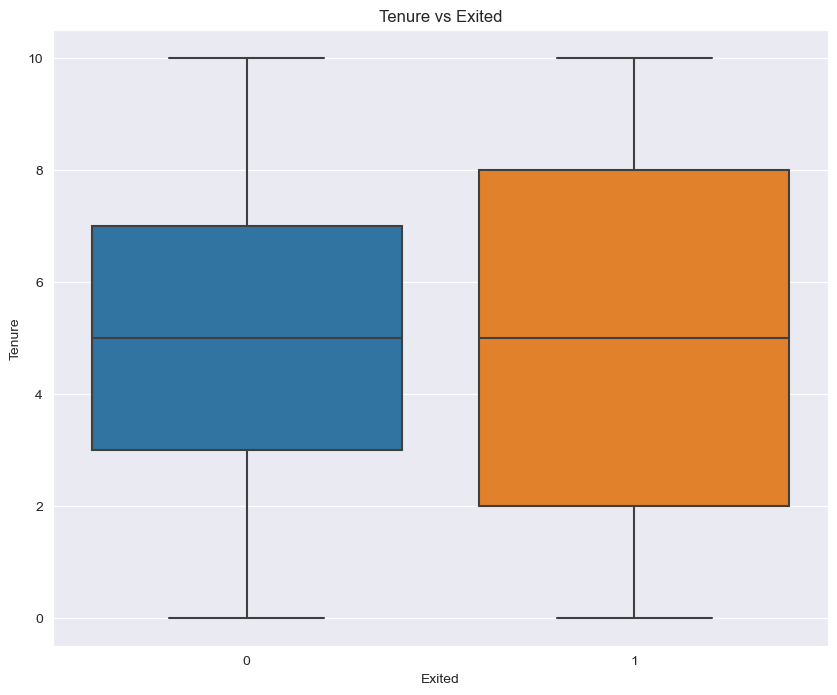

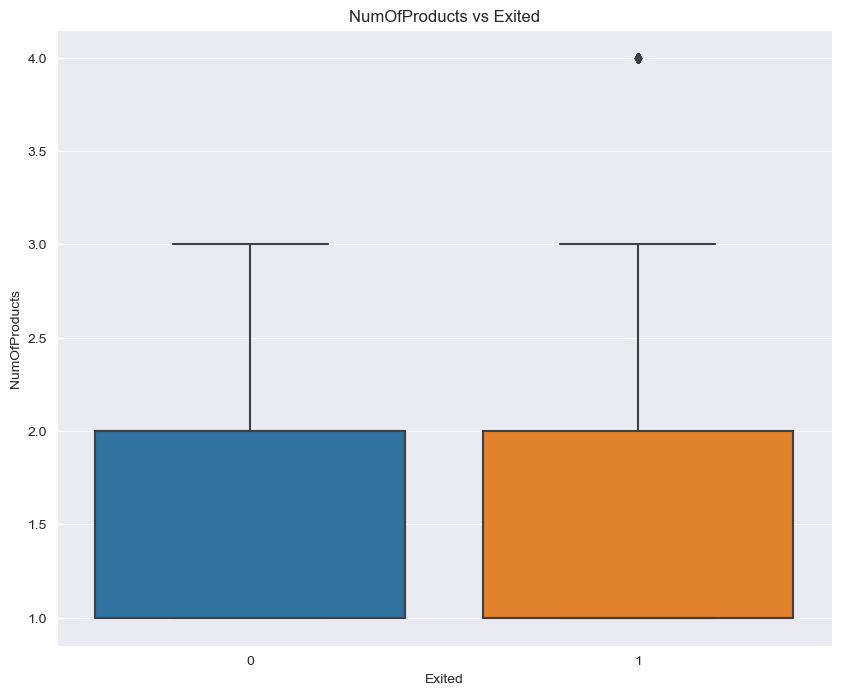

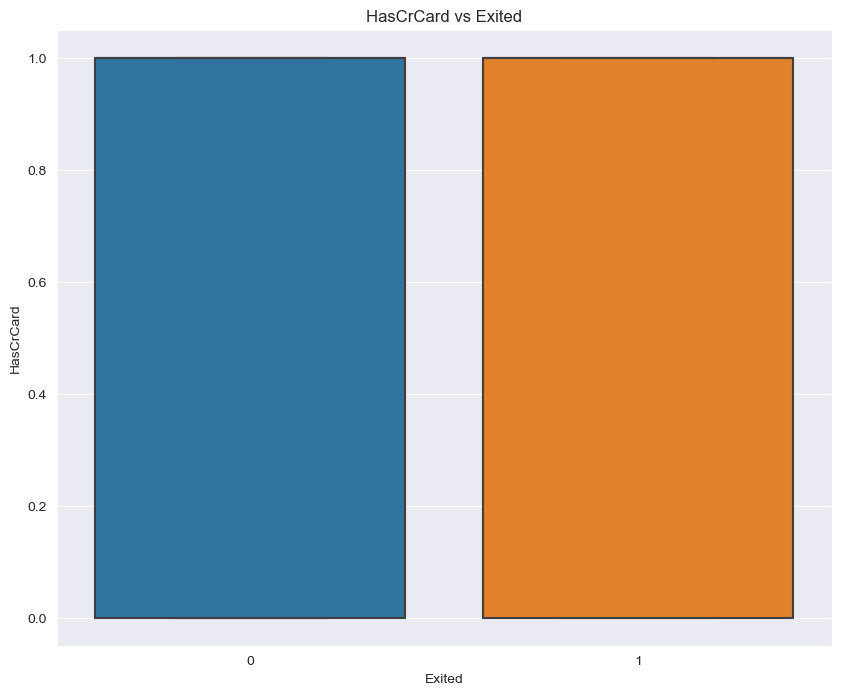

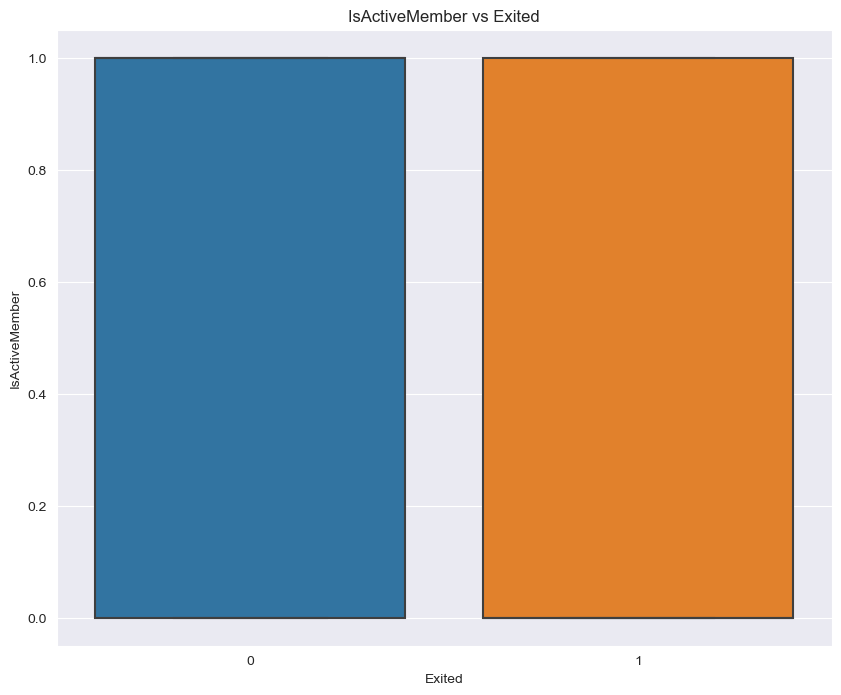

In [9]:
# create a function to run through the dataset and draw count plot with relation to Exited
def draw_count_plot(data, target_variable):

    # We only need numerical columns
    cols = data.select_dtypes(include=['int']).columns.tolist()

    # Loop through the columns
    for col in cols:
        if col != target_variable:
            plt.figure(figsize=(10, 8))
            sns.boxplot(x=data['Exited'], y=data[col])
            plt.title(f'{col} vs Exited')
            plt.xlabel('Exited')
            plt.ylabel(col)
            plt.show()
            
draw_count_plot(data, 'Exited')


### Findings
1. There is no much difference on the credit score on the clients that exited or did not exit.
2. With Age, the older clients are exting more than the younger clients.
3. 

In [10]:
data.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


## 5. Hypothesis Testing

In [11]:
# Hypothesis: Higher credit scores are associated with lower churn rates
# Null Hypothesis(Ho): Credit scores have no effect on customer churn rates
# Alternative hypothesis(H1): Higher credit are associated with lower church rates

# Extract data for each group (churned and not churned)
credit_churned = data[data['Exited'] == 1]['CreditScore']
credit_not_churned = data[data['Exited'] == 0]['CreditScore']

# Perform t-test to compare means
t_stat, p_value = stats.ttest_ind(credit_churned, credit_not_churned)

# Print results
print("T-Statistic:", t_stat)
print("P-Value:", p_value)

# Determine significance level (e.g., 0.05)
alpha = 0.05

# Check if p-value is less than alpha
if p_value < alpha:
    print("Reject null hypothesis: There is a significant difference in credit scores between churned and not churned customers.")
else:
    print("Fail to reject null hypothesis: There is no significant difference in credit scores between churned and not churned customers.")

T-Statistic: -2.7100778888729833
P-Value: 0.006738213892192373
Reject null hypothesis: There is a significant difference in credit scores between churned and not churned customers.


## 7. Data Cleaning

In [12]:
data.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

Outliers:
      CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
7             376   Germany  Female   29       4  115046.74              4   
942           376    France  Female   46       6       0.00              1   
1193          363     Spain  Female   28       6  146098.43              3   
1405          359    France  Female   44       6  128747.69              1   
1631          350     Spain    Male   54       1  152677.48              1   
1838          350   Germany    Male   39       0  109733.20              2   
1962          358     Spain  Female   52       8  143542.36              3   
2473          351   Germany  Female   57       4  163146.46              1   
2579          365   Germany    Male   30       0  127760.07              1   
8154          367     Spain    Male   42       6   93608.28              1   
8723          350    France    Male   51      10       0.00              1   
8762          350    France  Female   60       3      

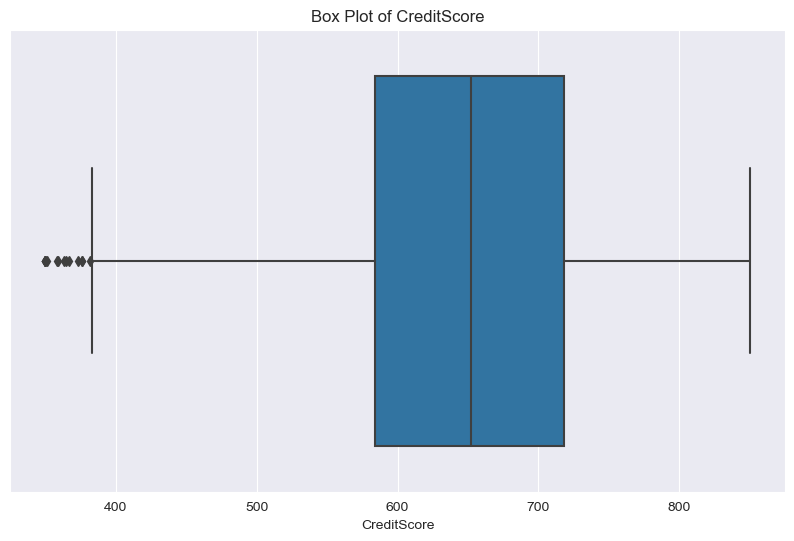

In [13]:
column_to_check = 'CreditScore'

# Calculate quartiles and IQR
Q1 = data[column_to_check].quantile(0.25)
Q3 = data[column_to_check].quantile(0.75)
IQR = Q3 - Q1

# Define upper and lower bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify and visualize outliers
outliers = data[(data[column_to_check] < lower_bound) | (data[column_to_check] > upper_bound)]
print("Outliers:")
print(outliers)

plt.figure(figsize=(10, 6))
sns.boxplot(x=data[column_to_check])
plt.title(f"Box Plot of {column_to_check}")
plt.show()

## 8. Feature Engineering

In [14]:
# Bin 'CreditScore' into three categories: Low, Medium, High
bins = [0, 600, 700, 850]
labels = ['Low', 'Medium', 'High']
data['CreditScore_Category'] = pd.cut(data['CreditScore'], bins=bins, labels=labels)

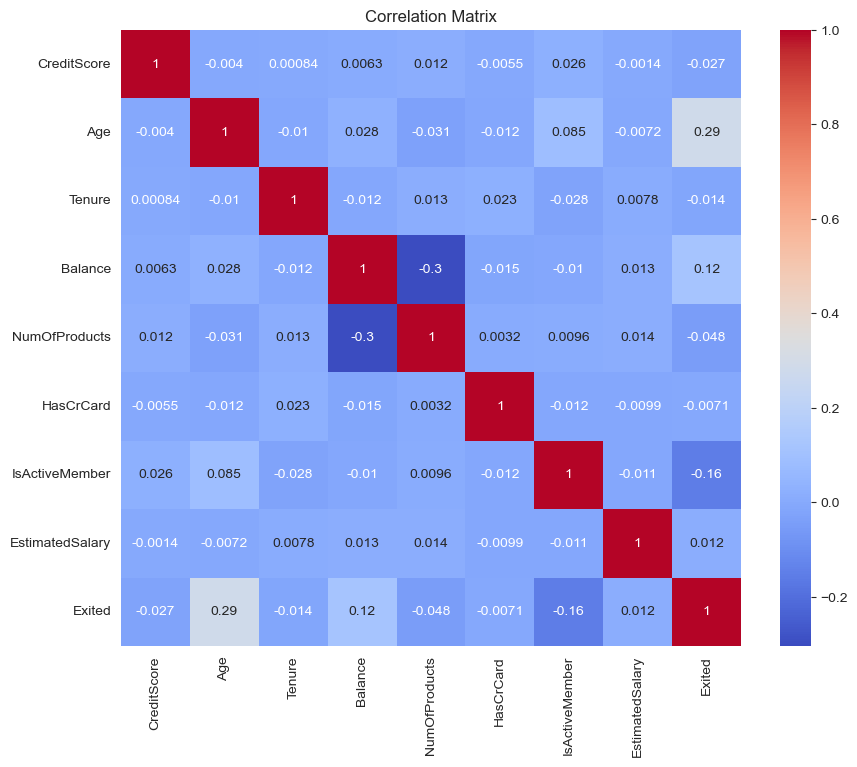

In [17]:
# Calculate the correlation matrix
correlation_matrix = data.corr()
correlation_matrix

# Visualize the correlation matrix
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()